# Clustering (Agrupamento)

Vamos usar o conjunto de dados de cidades para ver se conseguimos os estados em grupos relativamente homogêneos, a fim de direcionar políticas públicas mais específicas e eficazes auxiliando gestores públicos.

Suponha que o governo federal deseja identificar estados que necessitem de maior investimento no combate à pobreza e você foi encarregado de entregar a lista de tais estados. 

Para fazer essa análise precisaremos olhar para os dados, mas algumas perguntas podem surgir nesse momento como, por exemplo, "Qual(is) indicador(es) deveremos usar para fazer a classificação dos estados?" e "Qual será a linha de corte usada para a classificação?".

Estas questões, entre outras, podem atrapalhar a eficiência da política pública se forem escolhidas sem base técnica. Por exemplo, poderíamos considerar que precisa de mais investimento todos os estados cujo IDH seja menor que 0.7, esse é um critério possível mas arbitrário. Será que esse seria um bom valor para fazer a classificação? Se for muito baixo, alguns estados que precisam dos recursos acabariam ficando sem, e se for muito alto estaríamos enviando recursos para estados que não precisam, diminuindo a eficiência da política pública.

Vamos importar a biblioteca `pandas` e os nossos dados para começar a análise.

In [ ]:
# Importando as dependências externas
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [ ]:
# Criando o dataframe a partir da base de dados oficial
df = pd.read_excel('dados.xlsx')
df.head(2)

,nomeLocalidade,estado,População residente,Densidade demográfica,Porcentagem de Jovens,Porcentagem de Ativos,Porcentagem de Idosos,Taxa de Urbanização,Taxa de Saneamento Básico,Ativos com Baixo Nível Educacional,...,Percentual de empresas do setor terciário em relação ao total,Percentual de trabalhadores do setor primário em relação ao total,Percentual de trabalhadores do setor secundário em relação ao total,Percentual de trabalhadores do setor terciário em relação ao total,Média Salarial,Produtividade,Taxa de desemprego dos jovens,Taxa de desemprego,"Número de trabalhadores(Comerciais, hotéis e restaurantes) por 1,000 habitantes","Número de ativos culturais e de lazer por 10,000 habitantes"
0,Acrelândia,Acre,12538,6.93,52.92,43.04,4.04,48.34,0.00,75.34,...,75.41,8.86,21.53,34.07,994.67,2654247.23,19.17,9.62,12.12,0.0
1,Assis Brasil,Acre,6072,1.22,55.58,40.07,4.35,65.30,2.39,66.83,...,100.00,0.60,0.00,36.25,1163.49,2113108.99,10.57,7.44,17.79,0.0


Nesse primeiro momento vamos trabalhar com as variáveis `estado`, `PIB Municipal`, `% de pobres`, `IDH`, `Média Salarial` e `Taxa de desemprego` do nosso banco de dados e vamos agrupar os dados por estado.

In [ ]:
# Criando novo dataframe com as colunas de interesse
df2 = df[['estado', 'PIB Municipal', '% de pobres', 'IDH', 'Média Salarial', 'Taxa de desemprego']]
df2.head(2)

,estado,PIB Municipal,% de pobres,IDH,Média Salarial,Taxa de desemprego
0,Acre,1.221749e+08,36.56,0.81,994.67,9.62
1,Acre,4.205170e+07,44.09,0.77,1163.49,7.44


In [ ]:
# Calculando as médias por estado
df2 = df2.groupby(by='estado').mean()

# Ajustando o index
df2 = df2.reset_index()

df2.head(2)

,estado,PIB Municipal,% de pobres,IDH,Média Salarial,Taxa de desemprego
0,Acre,3.795693e+08,43.369091,0.767273,931.031818,5.955000
1,Alagoas,2.660082e+08,45.935490,0.739706,874.946373,9.200196


## Padronizando os Dados

Como os dados de diferentes variáveis estão em diferentes escalas, é necessário padronizar as variáveis de forma que todos contribuam igualmente nos cálculos de distâncias que serão feitos.

Para fazer a padronização vamos usar a função `StandardScaler()` do [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [ ]:
# Criando uma cópia do dataframe para os dados padronizados
df_scaled = df2.copy()

# Eliminando os dados em formato string
df_scaled.drop('estado', axis=1, inplace=True)

# Instanciando a função StandardScaler()
# @Hevans, esse passo é opcional, correto? Entendo que é só uma forma de simplificar a sintaxe no próximo passo
scaler = StandardScaler()

# Aplicando a padronização dos dados e transformando o array em dataframe
df_scaled[df_scaled.columns] = scaler.fit_transform(df_scaled)


# Reinserindo a coluna 'estado'
df_scaled['estado'] = df2['estado']

# Visualizando o dataframe padronizado
df_scaled.head(2)


,PIB Municipal,% de pobres,IDH,Média Salarial,Taxa de desemprego,estado
0,-0.206834,0.924792,-0.702782,-0.328065,-0.606967,Acre
1,-0.211010,1.085804,-1.465417,-0.522383,0.934667,Alagoas


## `Taxa de desemprego` x `% de pobres`

Suspeitamos que as variáveis `Taxa de desemprego` e `% de pobres` deve ter grande influência na identificação de estados que precisem de uma melhor política de combate à pobreza.

Para enxergar alguma relação nos dados, vamos fazer um gráfico de dispersão (scatterplot) usando a biblioteca [seaborn](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)

<Axes: xlabel='Taxa de desemprego', ylabel='% de pobres'>

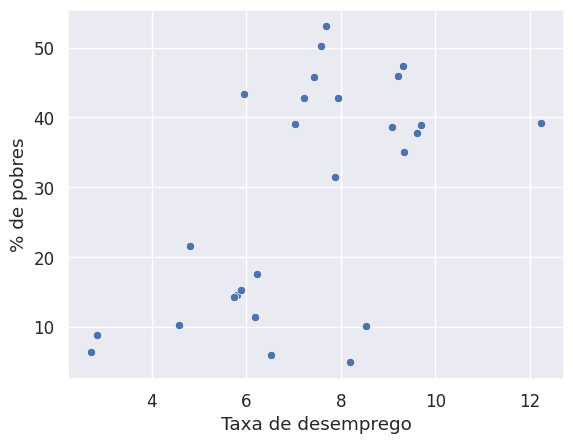

In [ ]:
# Gerando o gráfico de dispersão do df2
sns.scatterplot(data=df2, x=df2['Taxa de desemprego'], y=df2['% de pobres'])

<Axes: xlabel='Taxa de desemprego', ylabel='% de pobres'>

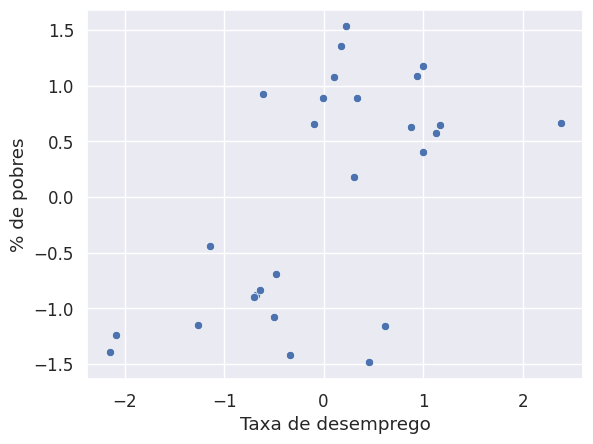

In [ ]:
# Gerando o gráfico de dispersão do df_scaled
sns.scatterplot(data=df_scaled, x=df_scaled['Taxa de desemprego'], y=df_scaled['% de pobres'])

Analisando este gráfico, parece haver uma divisão natural em dois grupos. Observe que estados com percentual de pobres menor que 20 possuem taxa de desemprego que vai de 3 a 8, aproximadamente, enquanto que estados com percentual de pobres maior que 30 possuem taxa de desemprego variando de 6 a 12, aproximadamente.

Parece haver uma correlação entre as variáveis, mesmo que não muito forte.

In [ ]:
# Avaliando correlações entre as variáveis do dataframe
df2.corr() #Coeficiente de correlação de 0.583135 entre 'Taxa de desemprego' e '% de pobres'

<ipython-input-32-2ab6b2dd5a70>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.corr() #Coeficiente de correlação de 0.583135 entre 'Taxa de desemprego' e '% de pobres'


,PIB Municipal,% de pobres,IDH,Média Salarial,Taxa de desemprego
PIB Municipal,1.000000,-0.303727,0.429402,0.543247,0.090652
% de pobres,-0.303727,1.000000,-0.908692,-0.105157,0.583135
IDH,0.429402,-0.908692,1.000000,0.319924,-0.529284
Média Salarial,0.543247,-0.105157,0.319924,1.000000,0.093576
Taxa de desemprego,0.090652,0.583135,-0.529284,0.093576,1.000000


Poderíamos usar apenas a variável `% de pobres` para criar a classificação, mas perceba que é interessante usar as duas variáveis, pois podemos assim obter não apenas os estados que mais precisam dos recursos como também indicadores de que áreas deveriam receber os recursos a fim de orientar as políticas públicas como, por exemplo, programas voltados à facilitação ao emprego.

O gráfico sugere que poderíamos usar essa duas variáveis para agrupar os estados e uma maneira de fazer isso é com o KMeans.

Usaremos a função `KMeans` da biblioteca [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

In [ ]:
#Aplicando a função KMeans da biblioteca scikit-learn (sklearn)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df_scaled[['Taxa de desemprego', '% de pobres']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

In [ ]:
# Visualizando os rótulos da variável 'kmeans'
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0], dtype=int32)

In [ ]:
# Criando a coluna 'grupo' para identificar a qual dos dois clusters cada estado pertence
df2['grupo'] = kmeans.labels_
df2.head(10)

# No tutorial, o Hevans utilizou o método '.tolist()' para fazer isso. Testei dos dois jeitos e vi que não \
# há necessidade. Fazendo sem  o '.tolist()' retorna o mesmo resultado

,estado,PIB Municipal,% de pobres,IDH,Média Salarial,Taxa de desemprego,grupo
0,Acre,3.795693e+08,43.369091,0.767273,931.031818,5.955000,0
1,Alagoas,2.660082e+08,45.935490,0.739706,874.946373,9.200196,0
2,Amapá,5.154880e+08,39.180625,0.783750,1239.088750,12.243125,0
3,Amazonas,9.820415e+08,53.020161,0.765968,2097.015484,7.696452,0
4,Bahia,3.701926e+08,38.945468,0.760168,865.359856,9.694556,0
5,Ceará,4.314891e+08,42.712772,0.761630,780.787609,7.216522,0
6,Distrito Federal,1.445732e+11,4.930000,0.870000,1814.710000,8.190000,1
7,Espírito Santo,1.095770e+09,14.555513,0.826026,932.606923,5.803590,1
8,Goiás,4.339869e+08,11.468008,0.825894,977.789228,6.186789,1
9,Maranhão,2.137135e+08,50.173733,0.740876,822.918157,7.589631,0


Agora, podemos visualizar novamente os dados considerando o agrupamento encontrado pelo `KMeans`.

<Axes: xlabel='Taxa de desemprego', ylabel='% de pobres'>

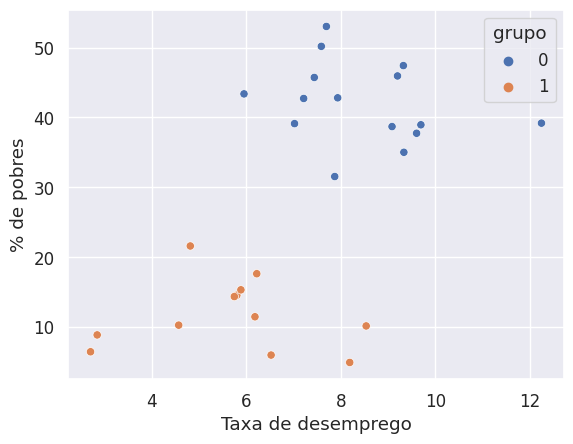

In [ ]:
# Gerando gráfico de dispersão com legenda de cores para os clusters
sns.scatterplot(data=df2, x=df2['Taxa de desemprego'], y=df2['% de pobres'], hue=df2['grupo'])

Podemos ver que os grupos encontrados pelo `KMeans` coincidem com nossa intuição (o que é um bom sinal) mas agora temos uma maneira técnica de justificar nossa classificação.

Observe que o `KMeans` separou em dois grupos `0` e `1`, mas não nos diz qual grupo precisa de mais investimento, essa tarefa é nossa. O algoritmo só conseguiu agrupar os dados similares mas não sabe o que eles significam.

Podemos ainda modificar um pouco nosso gráfico a fim de saber qual ponto representa cada estado.

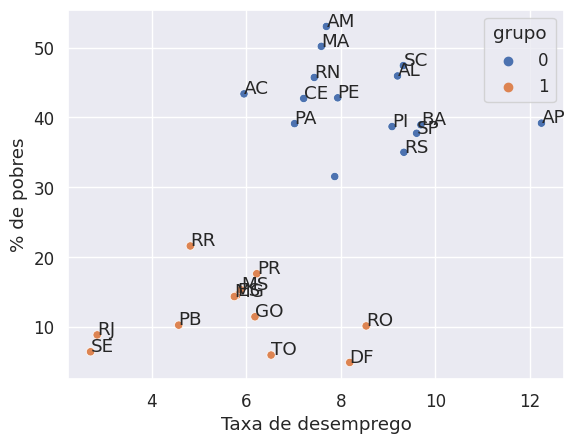

In [ ]:
# Adicionando siglas dos estados aos seus respectivos pontos no gráfico
sns.scatterplot(data=df2, x=df2['Taxa de desemprego'], y=df2['% de pobres'], hue=df2['grupo'])

# Instanciando variáveis
desemp = df2['Taxa de desemprego']
pobres = df2['% de pobres']
estados = ["AC", 'AL', 'AP', 'AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MS', 'MG', 'PR', 'PB', 'PA', 'PE', 'PI', 'RN', 'RS', 'RJ', 'RO', 'RR', 'SC', 'SE', 'SP', 'TO']

# Utilizando for loop para adicionar as siglas dos estados às respectivas coordenadas
for i in range(len(estados)):
  plt.text(x=desemp[i], y=pobres[i], s=estados[i])



Se precisássemos usar o algoritmo para classificar novos dados, 
bastaria usar a sintaxe da forma `kmeans.predict(novos_dados)`

In [ ]:
# Aplicando o método .predict
kmeans2 = kmeans.predict(df2[['Taxa de desemprego', '% de pobres']])
print(kmeans2)

# O resultado mostra todos os dados alocados ao mesmo cluster. Isso está certo?

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Na classificação acima nós usamos apenas as variáveis `Taxa de desemprego` e `% de pobres`, mas poderíamos usar outro par de variáveis. Se fizermos isso, será que obteremos o mesmo agrupamento?

# Encontrando o Melhor k

Nos exemplos acima estavámos interessados em obter dois grupos, mas como devemos proceder quando não soubermos a quantidade natural de grupos que devemos procurar? Nestes casos existem métodos que nos ajudam a encontrar o melhor valor de k.


### Método de Cotovelo (Elbow Method)
Neste método, a ideia é rodar o KMeans para várias quantidades diferentes de clusters (k) e tentar encontrar um número ótimo de clusters. Quando aumentamos muito a quantidade de clusters no KMeans, as diferenças entre clusters se tornam muito pequenas, e as diferenças das observações intra-clusters vão aumentando.

Com o Método de Cotovelo, utilizaremos a métrica da Soma dos Quadrados Intra-Clusters (WCSS / Inércia), que é a soma das distâncias entre os objetos e o centróides (centros do agrupamento), isso nos dá uma ideia de similaridade e, portanto, nos ajuda a encontrar um valor adequado para k.

In [ ]:
# Criando lista vazia para inserir as inércias
inercia = []

# Definind os parâmetros de cálculo
k_min = 2
k_max = 10

# Laço de repetição para cálculo iterativo da inércia
for i in range (k_min, k_max+1):
  kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
  kmeans.fit(df_scaled[['Taxa de desemprego', '% de pobres']])
  inercia.append(kmeans.inertia_)

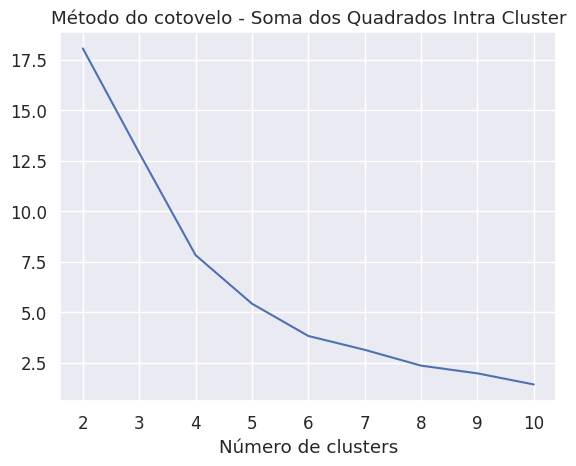

In [ ]:
# Definindo o estilo geral dos gráficos
sns.set(style='darkgrid', font_scale=1.1)

# Gerando o gráfico de 'cotovelo'
sns.lineplot(x=range(k_min, k_max+1), y=inercia)

# Formatando o gráfico
plt.title('Método do cotovelo - Soma dos Quadrados Intra Cluster')
plt.xlabel("Número de clusters")
plt.grid=True

Outro método utilizado é calcular o número ótimo de clusters com base no ponto que mais se afasta de uma linha traçada entre o primeiro e o último pontos no gráfico do cotovelo.

Basicamente vamos calcular a distância de cada ponto da forma (n,inercia[n]) para n inteiro até a reta formada pelo primeiro ponto do gráfico e o último. A forma para calcular essa distância é dada por $distância(reta, (x,y)) = \frac{|(y_1 - y_0)x - (x_1 - x_0)y + x_1 y_0 - y_1 x_0|}{\sqrt{(y_1-y_0)^2 + (x_1-x_0)^2}}$

Para mais detalhes veja [medium](https://medium.com/pizzadedados/kmeans-e-metodo-do-cotovelo-94ded9fdf3a9)


### Coeficiente de Silhueta
O Coeficiente de Silhueta é a medida de quão semelhante um objeto é ao seu próprio cluster (coesão) em comparação com outros clusters (separação).

Vamos importar a métrica `silhouette_score` do [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)


O coeficiente silhuera varia de -1 a +1, em que +1 denota está muito coeso com seu cluster e muitos distante dos demais clusters; 0 denota sobreposição de clusters e -1 indica resultados muito ruins.


Para mais detalhes veja [silhueta](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#:~:text=The%20silhouette%20plot%20displays%20a,of%20%5B%2D1%2C%201%5D.)

In [ ]:
# Criando lista vazia para inserir os coeficientes de silhueta
silhueta = []

# Definindo os parâmetros gerais de cálculo
k_min = 2
k_max = 10
n = [i for i in range(k_min, k_max+1)]

# Criando laço de repetição para cálculo do coeficiente de silhueta para diferentes números de clusters
for i in range(k_min,k_max+1):
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(df_scaled[['Taxa de desemprego','% de pobres']])
  silhueta.append(silhouette_score(df_scaled[['Taxa de desemprego','% de pobres']], kmeans.labels_, metric='euclidean'))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
print(silhueta)

[0.5822282283405786, 0.4907150452794632, 0.45871170806681044, 0.5259444915615071, 0.5166769133326405, 0.4854114513067814, 0.4421900496450175, 0.46686358734783934, 0.4638708731245167]


Text(0.5, 0, 'Número de Clusters')

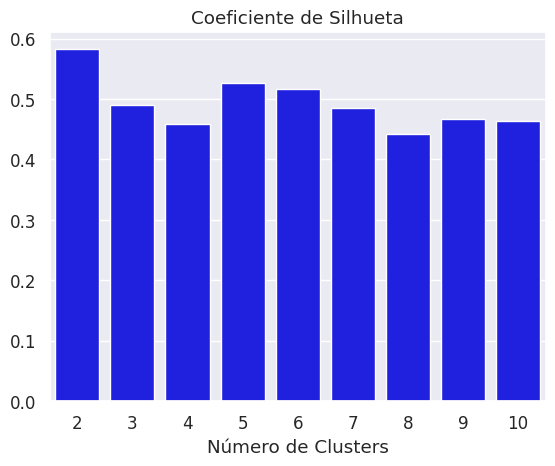

In [ ]:
# Criando gráfico de barras para representação dos coeficientes de silhueta
sns.barplot(x=n, y=silhueta, color='blue')
plt.title('Coeficiente de Silhueta')
plt.xlabel('Número de Clusters')

Também podemos sobrepor os gráficos do cotovelo e da silhueta. Veremos que estes dois gráficos acabam se encontrando e esse encontro se dá no melhor valor para k

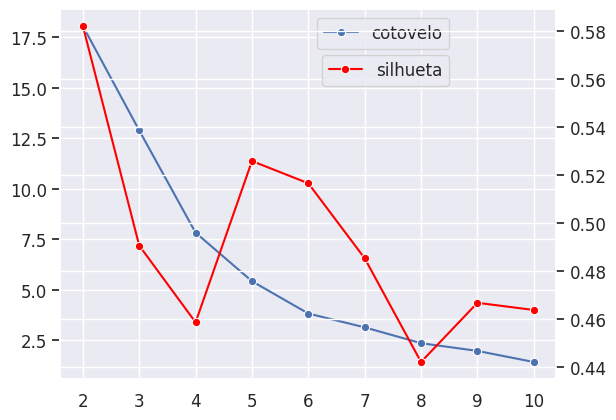

In [ ]:
# Criandos gráficos de linhas sobrepostas com ambos os coeficientes
fig, ax = plt.subplots()
sns.lineplot(x=range(k_min,k_max+1), y=inercia, marker='o')
plt.legend(labels=['cotovelo'], bbox_to_anchor=(0.8,1), loc='upper right')
ax2 = ax.twinx()
sns.lineplot(x=range(k_min, k_max+1), y=silhueta, marker='o', color='red')
plt.legend(labels=['silhueta'], bbox_to_anchor=(0.8, 0.9), loc='upper right');